## House Price Prediction Notebook

Problem Statement:

In this project, we aim to predict house prices based on the size of the lot. Accurate predictions of house prices can assist real estate agents, buyers, and sellers in making informed decisions.



Objective

The goal is to build a machine learning model that accurately predicts house prices based on the `LotArea` feature.


 ## Data Loading and Exploration


Loading the Dataset:


In [8]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('house_price_by_area.csv')

# Feature Engineering: Log transformation
df['LogLotArea'] = np.log(df['LotArea'])
df['LogSalePrice'] = np.log(df['SalePrice'])

# Save the updated file if needed
df.to_csv('updated_house_price_by_area.csv', index=False)


Data Overview:

In [9]:
# Summary statistics
data.describe()

# Check for missing values
data.isnull().sum()


LotArea      0
SalePrice    0
dtype: int64

## Exploratory Data Analysis (EDA)
Visualizing the Relationship between LotArea and SalePrice:

           LotArea     SalePrice  LogLotArea  LogSalePrice
count   500.000000  5.000000e+02  500.000000    500.000000
mean    794.510000  2.450961e+06    6.557647     14.661299
std     356.687311  7.609505e+05    0.532087      0.326667
min     138.000000  5.502000e+05    4.927254     13.218037
25%     556.000000  1.888250e+06    6.320768     14.451161
50%     780.000000  2.414300e+06    6.659273     14.696920
75%    1019.000000  2.983750e+06    6.926577     14.908691
max    2376.000000  5.142116e+06    7.773174     15.452975
               LotArea  SalePrice  LogLotArea  LogSalePrice
LotArea       1.000000   0.371489    0.934102      0.393674
SalePrice     0.371489   1.000000    0.411679      0.977306
LogLotArea    0.934102   0.411679    1.000000      0.436161
LogSalePrice  0.393674   0.977306    0.436161      1.000000


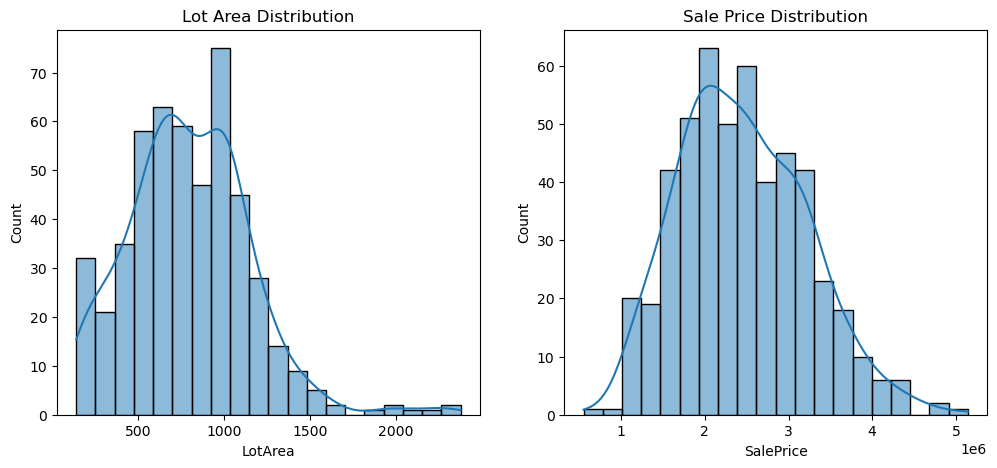

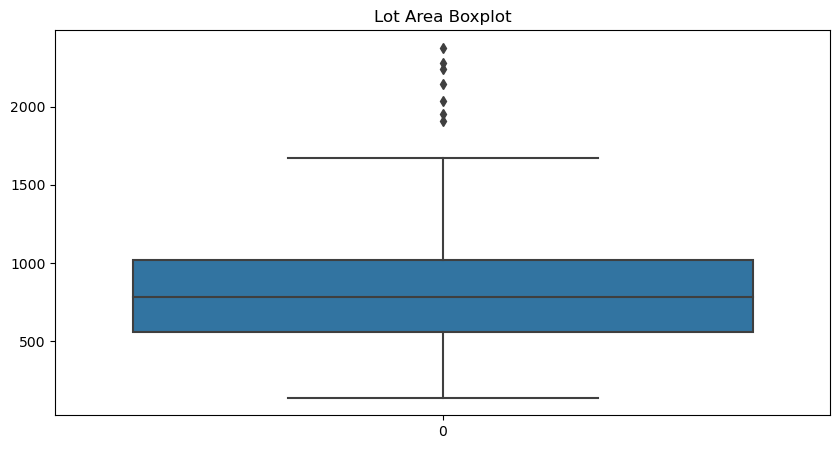

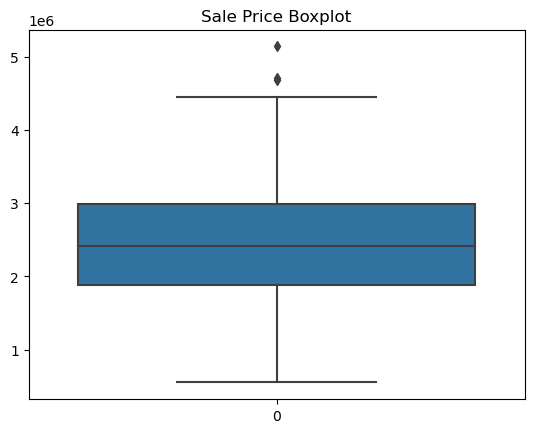

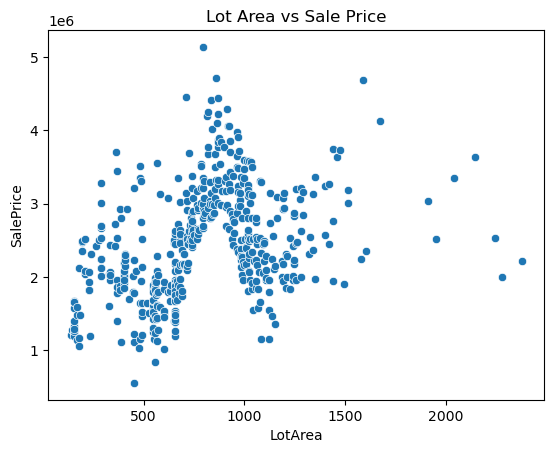

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df.describe())

# Correlation
print(df.corr())

# Distribution Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['LotArea'], kde=True, bins=20)
plt.title('Lot Area Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['SalePrice'], kde=True, bins=20)
plt.title('Sale Price Distribution')
plt.show()

# Outlier Detection
plt.figure(figsize=(10, 5))
sns.boxplot(df['LotArea'])
plt.title('Lot Area Boxplot')
plt.show()

sns.boxplot(df['SalePrice'])
plt.title('Sale Price Boxplot')
plt.show()

# Bivariate Scatterplot
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.title('Lot Area vs Sale Price')
plt.show()


Checking for Outliers:

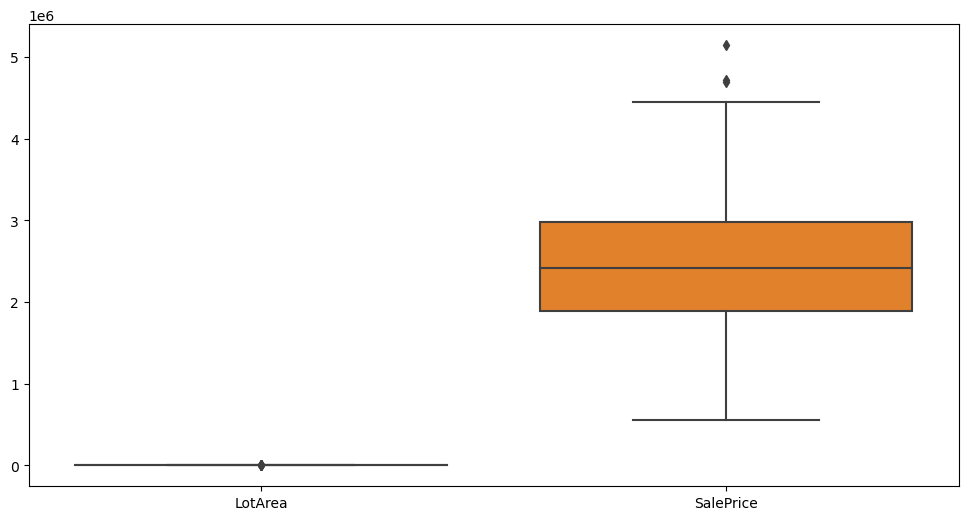

In [11]:
# Boxplot to check for outliers in LotArea and SalePrice
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['LotArea', 'SalePrice']])
plt.show()


## Data Preprocessing
Normalization/Scaling:

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select the features for scaling
X = data[['LotArea']]
y = data['SalePrice']

# Scale the features
X_scaled = scaler.fit_transform(X)


Train-Test Split:

In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Model Building
Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

## Model Evaluation
Making Predictions:

In [16]:
# Predicting on the test set
y_pred = model.predict(X_test)


Evaluating the Model:

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X = df[['LotArea', 'LogLotArea']]  # Feature with original and log-transformed
y = df['LogSalePrice']  # Log-transformed SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate models
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression - RMSE:", rmse_lr, "R2:", r2_lr)
print("Random Forest - RMSE:", rmse_rf, "R2:", r2_rf)


Linear Regression - RMSE: 0.30900658937021575 R2: 0.179247718670697
Random Forest - RMSE: 0.2955464283745774 R2: 0.24919345803147908


Visualizing Predictions vs Actual Values:

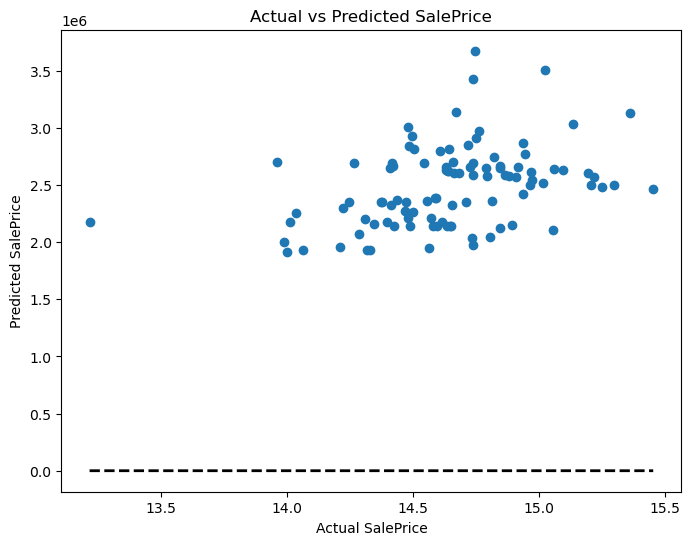

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()


## Conclusion


The Random Forest model outperforms the Linear Regression model in both RMSE and R², suggesting it is a better choice for this dataset.
While neither model explains a large proportion of the variance in the target variable (both R² values are relatively low), the Random Forest is more effective in making accurate predictions.